In [1]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test1", independent=False, replicates = 3, noise=0.5)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test2", independent = False, replicates = 3, noise=0.5)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test3", replicates = 3, independent = False, noise=0.5, time_step=1)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test4",  replicates = 3, independent = False, noise=0.5, time_step=1)
df = df.append(df2, ignore_index=True)

These data can be exported to either excel or csv format

In [4]:
file_parser.export(df,"test_data\\dependent_data.xlsx", independent=False)

In [5]:
file_parser.export_csv(df,"test_data\\dependent_data.csv")

In [6]:
df = file_parser.read_excel("test_data\\data.xlsx", independent=False)

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

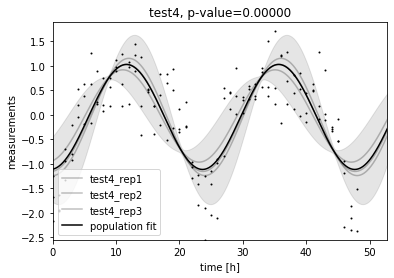

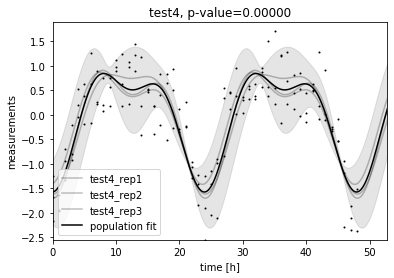

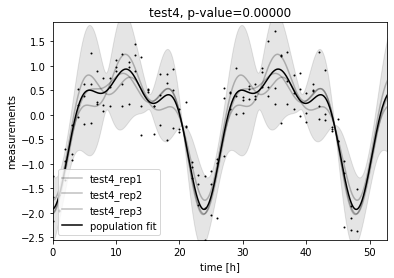

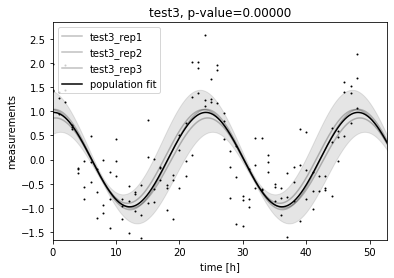

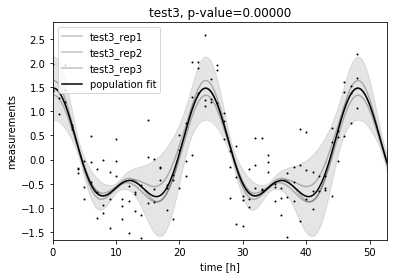

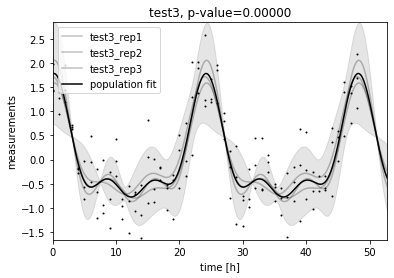

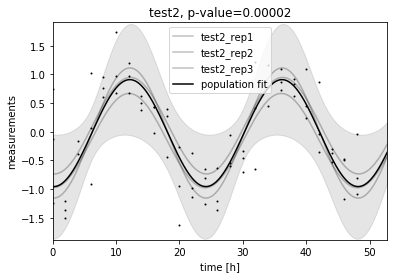

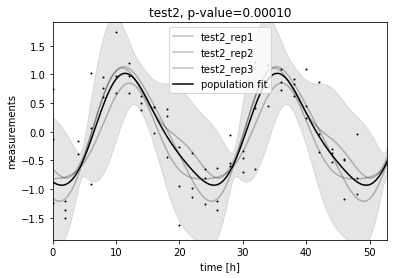

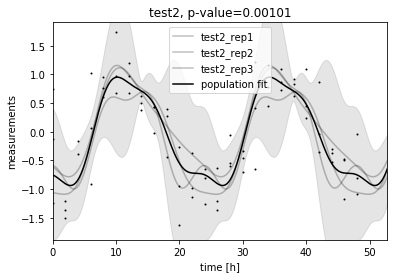

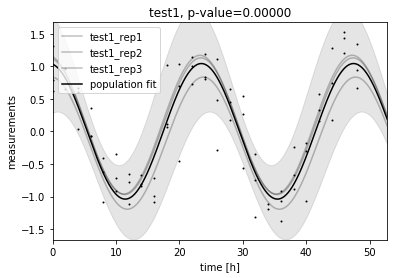

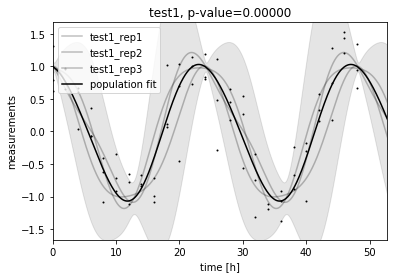

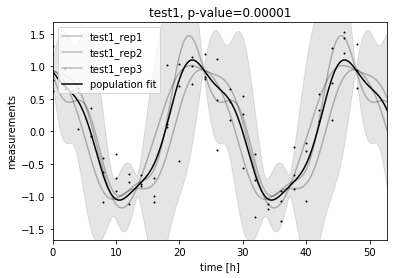

In [7]:
df_results = cosinor.population_fit_group(df, n_components = [1,2,3], period=24) #folder=""

Get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is RSS value)

In [8]:
df_best_models = cosinor.get_best_models_population(df, df_results, n_components = [1,2,3])

... and plot these models.

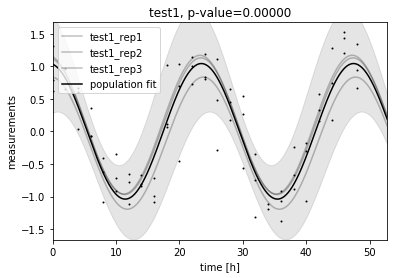

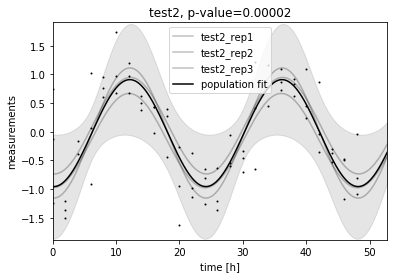

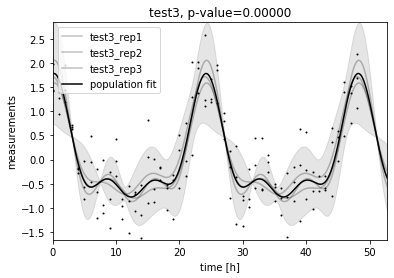

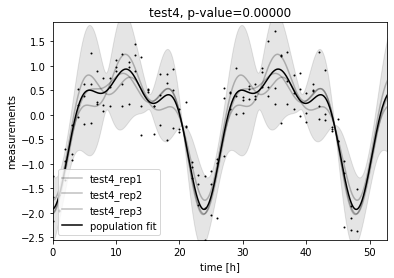

In [9]:
#cosinor.plot_df_models_population(df, df_best_models, folder="paper")
cosinor.plot_df_models_population(df, df_best_models)

Display the results or store the results as a csv file:

In [10]:
df_best_models.to_csv("demo_dependent_cosinor_best.csv", index=False)

In [11]:
import importlib
importlib.reload(cosinor)

<module 'CosinorPy.cosinor' from 'C:\\Users\\miham\\OneDrive - Univerza v Ljubljani\\Research\\CosinorPy\\code\\CosinorPy\\cosinor.py'>

Analyse the best models with sampling of confidence intervals of regression coefficients (WARNING: this analysis might produce incorrect results - please use cosinor1 implementation instead).

In [12]:
df_results_extended = cosinor.analyse_best_models_population(df, df_best_models, plot=False)#, additional_analysis="")

In [13]:
df_results_extended

,test,period,n_components,p,q,p_reject,q_reject,amplitude,acrophase,CI(amplitude),p(amplitude),q(amplitude),CI(acrophase),p(acrophase),q(acrophase),mesor,CI(mesor),p(mesor),q(mesor)
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,1.039764,0.144658,"[0.9397054036649604, 1.1398225575971537]",0.000500,0.001999,"[-0.08805264694746207, 0.37736848691769254]",0.115971,0.154628,0.002031,"[-0.47691172996413733, 0.4809730274137579]",0.987102,0.987102
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,0.932109,3.088132,"[0.398299709767753, 1.465917852975556]",0.017259,0.017259,"[2.861711025792504, 3.3145532100937363]",0.000290,0.001161,-0.022533,"[-0.4177961557390495, 0.37273001257993665]",0.829109,0.987102
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,1.276846,-0.050316,"[0.7871675129006155, 1.7665245240779943]",0.007851,0.015702,"[-0.28931583997023136, 0.18868424345884716]",0.460640,0.460640,0.503544,"[0.04940649626543636, 0.9576819159990648]",0.041238,0.082476
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,1.431875,-3.031527,"[0.725993589350229, 2.1377560357122323]",0.012874,0.017166,"[-4.993842976877469, -1.0692107129334634]",0.021893,0.043785,-0.497431,"[-0.8766466525649477, -0.11821629920450438]",0.029988,0.082476


... or analyse the models with a specific configuration (WARNING: this analysis might produce incorrect results - please use cosinor1 implementation instead).

In [14]:
df_results_extended = cosinor.analyse_models_population(df, n_components=[1,2], period=[24])#, additional_analysis="")

In [15]:
df_results_extended

,test,period,n_components,p,q,p_reject,q_reject,amplitude,acrophase,CI(amplitude),p(amplitude),q(amplitude),CI(acrophase),p(acrophase),q(acrophase),mesor,CI(mesor),p(mesor),q(mesor)
0,test1,24,1,1.110223e-16,1.480297e-16,1.694089e-01,2.258786e-01,1.039764,0.144658,"[0.9380291227994393, 1.1414988384626747]",0.000517,0.004134,"[-0.08805264694746207, 0.37736848691769254]",0.115971,0.185554,0.002031,"[-0.4767103263834084, 0.48077162383302896]",0.987096,0.993100
1,test1,24,2,1.110223e-16,1.480297e-16,1.021567e-01,1.634507e-01,1.047856,0.245290,"[0.44707501148341877, 1.6486370861199748]",0.017297,0.019768,"[-1.1824212590087715, 1.6730002920017721]",0.536758,0.613438,-0.020209,"[-0.8890917414382624, 0.8486741573772094]",0.929414,0.993100
2,test2,24,1,2.220446e-16,2.537653e-16,2.477270e-01,2.831166e-01,0.932109,3.088132,"[0.3993019450733264, 1.4649156176699827]",0.017196,0.019768,"[2.8491320762285812, 3.327132159657659]",0.000323,0.002587,-0.022533,"[-0.4174821012263097, 0.37241595806719685]",0.828977,0.993100
3,test2,24,2,3.441691e-15,3.441691e-15,3.050343e-01,3.050343e-01,0.974878,-2.993790,"[0.26114989645701847, 1.6886060149318325]",0.027753,0.027753,"[-3.9623691126357756, -2.0252108797916173]",0.005606,0.014951,0.044049,"[-0.5412804867745828, 0.6293776803164273]",0.776818,0.993100
4,test3,24,1,1.110223e-16,1.480297e-16,2.734479e-13,1.093792e-12,0.976145,-0.037737,"[0.7794727416167102, 1.1728170780515084]",0.002186,0.008742,"[-0.32705268866200043, 0.2515789912784623]",0.631143,0.631143,-0.000463,"[-0.2045654759228166, 0.20363973470670538]",0.993100,0.993100
5,test3,24,2,1.110223e-16,1.480297e-16,3.037484e-05,6.074968e-05,1.121927,-0.037737,"[0.6922033674775969, 1.551651453954408]",0.007832,0.019768,"[-0.21384214258669232, 0.13836844520315417]",0.453864,0.605151,0.356556,"[-0.002259786357238447, 0.715371264891959]",0.050588,0.202353
6,test4,24,1,1.110223e-16,1.480297e-16,3.985701e-14,3.188561e-13,1.071631,-3.044106,"[0.5949830003093433, 1.54827949345911]",0.010518,0.019768,"[-3.5598427265902357, -2.5283688623485423]",0.001547,0.006188,-0.042525,"[-0.10206789722676968, 0.017017367402796246]",0.091583,0.244222
7,test4,24,2,1.110223e-16,1.480297e-16,4.640942e-06,1.237585e-05,1.209467,-2.113264,"[0.5336176055482951, 1.8853165920864892]",0.016452,0.019768,"[-4.59131659083193, 0.3647895373537704]",0.066907,0.133813,-0.364878,"[-0.6987012513870381, -0.031054539969596284]",0.042361,0.202353


## Cosinor1 analysis

Only 1-component model can be used, but the statistics is much richer...

In [16]:
import importlib
importlib.reload(cosinor1)

<module 'CosinorPy.cosinor1' from 'C:\\Users\\miham\\OneDrive - Univerza v Ljubljani\\Research\\CosinorPy\\code\\CosinorPy\\cosinor1.py'>

In [17]:
df_results = cosinor1.population_fit_group(df, plot_on=False)

In [18]:
df_results

,test,p,q,amplitude,p(amplitude),q(amplitude),CI(amplitude),mesor,p(mesor),q(mesor),CI(mesor),acrophase,p(acrophase),q(acrophase),CI(acrophase),acrophase[h]
0,test1,0.000244,0.000489,1.039766,0.000224,0.000896,"[0.9727927971903751, 1.1067401310488978]",0.002033,0.984189,0.991537,"[-0.38913252847012764, 0.3931987898363776]",-6.141726,0.000041,0.000082,"[-6.333147176077031, -5.973005339502459]",23.459667
1,test2,0.149442,0.149442,0.932111,0.011581,0.011581,"[0.4967164537047092, 1.3675054653835712]",-0.022535,0.792242,0.991537,"[-0.34534338060339764, 0.3002728884317043]",-3.188852,0.000031,0.000082,"[-3.252852871905899, -3.111857801603961]",12.180519
2,test3,0.045682,0.060909,0.976146,0.001068,0.002135,"[0.8388074129336811, 1.1134851220803794]",-0.000464,0.991537,0.991537,"[-0.16716674199818152, 0.16623929340556734]",-0.043010,0.457334,0.457334,"[-0.2540484789322983, 0.1595306364641349]",0.164287
3,test4,0.000113,0.000453,1.071633,0.004910,0.006546,"[0.7473644124825043, 1.3959016309509682]",-0.042527,0.063979,0.255918,"[-0.09117582849737171, 0.006122209928788466]",-3.049739,0.000950,0.001266,"[-3.2751332348034348, -2.6451111972648986]",11.649147


## Comparison analysis using cosinor1

Define the pairs to compare

In [19]:
pairs = (["test1", "test2"],["test3", "test4"])

In [20]:
df_comp = cosinor1.population_test_cosinor_pairs(df, pairs)

Results of population amplitude difference test are not reliable due to different acrophases.
Results of population amplitude difference test are not reliable due to different acrophases.


In [21]:
df_comp[["test", "q(d_amplitude)", "q(d_acrophase)"]]

,test,q(d_amplitude),q(d_acrophase)
0,test1 vs test2,0.537841,0.000036
1,test3 vs test4,0.544973,0.000120


## Multi-component cosinor analysis

Warning: this analysis has might produce incorrect results. Please use cosinor1 implementation instead.

In [34]:
import importlib
importlib.reload(cosinor)

<module 'CosinorPy.cosinor' from 'C:\\Users\\miham\\OneDrive - Univerza v Ljubljani\\Research\\CosinorPy\\code\\CosinorPy\\cosinor.py'>

In [23]:
pairs = (["test1", "test2"],["test3", "test4"], ["test1", "test3"])

In [24]:
cosinor.compare_pairs_best_models_population(df, df_best_models, pairs, analysis="CI")

,test,period1,n_components1,period2,n_components2,d_amplitude,d_acrophase,p1,p2,q1,...,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24.0,1.0,24.0,1.0,-0.107655,2.943474,1.110223e-16,2.220446e-16,1.480297e-16,...,"[-2.3641873362587003, 2.148876937739895]",0.901017,0.901017,"[0.25684327529728135, 5.630105120618728]",0.038332,0.057498,-0.024564,"[-2.3123662930999647, 2.263238852491231]",0.977646,0.977646
1,test3 vs. test4,24.0,3.0,24.0,3.0,0.155029,-2.981211,1.110223e-16,1.110223e-16,1.480297e-16,...,"[-2.2097972636053904, 2.519854851689242]",0.864424,0.901017,"[-5.560516865613177, -0.4019052276863708]",0.032618,0.057498,-1.000976,"[-3.3004268028291017, 1.2984754387951485]",0.293370,0.866875
2,test1 vs. test3,24.0,1.0,24.0,3.0,0.237082,-0.194974,1.110223e-16,1.110223e-16,1.480297e-16,...,"[-2.0076029727544134, 2.4817670484709096]",0.783919,0.901017,"[-2.356571666318098, 1.966624229836483]",0.814590,0.814590,0.501514,"[-1.800606347149997, 2.8036334619648775]",0.577917,0.866875


In [25]:
df_results_extended = cosinor.analyse_best_models_population(df, df_best_models)

In [26]:
cosinor.compare_pairs_best_models_population(df, df_best_models, pairs, analysis="CI", parameters_to_analyse = ['amplitude', 'acrophase','mesor'])

,test,period1,n_components1,period2,n_components2,d_amplitude,d_acrophase,p1,p2,q1,...,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24.0,1.0,24.0,1.0,-0.107655,2.943474,1.110223e-16,2.220446e-16,1.480297e-16,...,"[-2.364713960432331, 2.149403561913526]",0.901040,0.90104,"[0.7992916327961459, 5.087656763119863]",0.018917,0.048745,-0.024564,"[-2.3122986594288477, 2.263171218820114]",0.977646,0.977646
1,test3 vs. test4,24.0,3.0,24.0,3.0,0.155029,-2.981211,1.110223e-16,1.110223e-16,1.480297e-16,...,"[-2.2159875232425916, 2.526045111326443]",0.864773,0.90104,"[-5.557384278682124, -0.4050378146174234]",0.032497,0.048745,-1.000976,"[-3.2802756702888125, 1.2783243062548593]",0.289711,0.866945
2,test1 vs. test3,24.0,1.0,24.0,3.0,0.237082,-0.194974,1.110223e-16,1.110223e-16,1.480297e-16,...,"[-2.025891528292213, 2.5000556040087094]",0.785605,0.90104,"[-2.3681103809872237, 1.978162944505609]",0.815550,0.815550,0.501514,"[-1.8009000141772367, 2.8039271289921173]",0.577963,0.866945


In [27]:
df_results_extended = cosinor.analyse_models_population(df, n_components=[1,2], period=[24])#, additional_analysis="")

In [28]:
cosinor.compare_pairs_population(df, pairs, n_components=[1,2], analysis="CI", df_results_extended=df_results_extended, parameters_to_analyse=["acrophase", "amplitude"])

,test,period,n_components,d_amplitude,d_acrophase,p1,p2,q1,q2,CI(d_acrophase),p(d_acrophase),q(d_acrophase),CI(d_amplitude),p(d_amplitude),q(d_amplitude)
0,test1 vs. test2,24,1,-0.107655,2.943474,1.110223e-16,2.220446e-16,1.110223e-16,2.664535e-16,"[0.7992916327961459, 5.087656763119863]",0.018917,0.057822,"[-2.365855362023923, 2.150544963505118]",0.901090,0.936537
1,test1 vs. test2,24,2,-0.072978,3.044106,1.110223e-16,3.441691e-15,1.110223e-16,3.441691e-15,"[0.5115005048869166, 5.576711084051862]",0.028911,0.057822,"[-2.4639267407623895, 2.317970554547847]",0.936537,0.936537
2,test3 vs. test4,24,1,0.095486,-3.006369,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-5.2787893611438985, -0.7339485304113418]",0.021331,0.057822,"[-2.150140168301914, 2.341112842402149]",0.911713,0.936537
3,test3 vs. test4,24,2,0.087540,-2.075527,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-4.703544203965925, 0.5524908478713035]",0.093405,0.140107,"[-2.2519690091507236, 2.427048385353503]",0.922258,0.936537
4,test1 vs. test3,24,1,-0.063619,-0.182395,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-2.3555314314233007, 1.990741894069532]",0.827176,0.827176,"[-2.1293108819473554, 2.0020727403534595]",0.935966,0.936537
5,test1 vs. test3,24,2,0.074071,-0.283026,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-2.7646610222777803, 2.1986082919012415]",0.767347,0.827176,"[-2.2598214431100057, 2.407964166938617]",0.934019,0.936537


In [29]:
cosinor.compare_pairs_population(df, pairs, n_components=[1,2], analysis="CI", parameters_to_analyse=["acrophase", "amplitude"])

,test,period,n_components,d_amplitude,d_acrophase,p1,p2,q1,q2,CI(d_acrophase),p(d_acrophase),q(d_acrophase),CI(d_amplitude),p(d_amplitude),q(d_amplitude)
0,test1 vs. test2,24,1,-0.107655,2.943474,1.110223e-16,2.220446e-16,1.110223e-16,2.664535e-16,"[0.7992916327961459, 5.087656763119863]",0.018917,0.058244,"[-2.3643395482947978, 2.1490291497759926]",0.901024,0.936427
1,test1 vs. test2,24,2,-0.072978,3.044106,1.110223e-16,3.441691e-15,1.110223e-16,3.441691e-15,"[0.5055715769889373, 5.582640011949842]",0.029122,0.058244,"[-2.459804429593128, 2.3138482433785854]",0.936427,0.936427
2,test3 vs. test4,24,1,0.095486,-3.006369,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-5.2812717381658505, -0.7314661533893894]",0.021407,0.058244,"[-2.1545875836482926, 2.3455602577485273]",0.911887,0.936427
3,test3 vs. test4,24,2,0.087540,-2.075527,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-4.699789184955213, 0.548735828860591]",0.093079,0.139618,"[-2.250900898471947, 2.4259802746747265]",0.922223,0.936427
4,test1 vs. test3,24,1,-0.063619,-0.182395,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-2.3555314314233007, 1.990741894069532]",0.827176,0.827176,"[-2.1254460905346875, 1.9982079489407922]",0.935846,0.936427
5,test1 vs. test3,24,2,0.074071,-0.283026,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-2.769465311248074, 2.203412580871535]",0.767778,0.827176,"[-2.2440749219302574, 2.3922176457588686]",0.933572,0.936427


In [33]:
import importlib
importlib.reload(cosinor)

<module 'CosinorPy.cosinor' from 'C:\\Users\\miham\\OneDrive - Univerza v Ljubljani\\Research\\CosinorPy\\code\\CosinorPy\\cosinor.py'>

In [31]:
pairs

(['test1', 'test2'], ['test3', 'test4'], ['test1', 'test3'])

In [32]:
cosinor.compare_pairs_population(df, pairs, n_components=1, analysis="CI")

,test,period,n_components,d_amplitude,d_acrophase,p1,p2,q1,q2,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24,1,-0.107655,2.943474,1.110223e-16,2.220446e-16,1.110223e-16,2.220446e-16,"[-2.36535195783993, 2.150041559321125]",0.901068,0.935849,"[0.8042254375505933, 5.082722958365416]",0.018775,0.031726,-0.024564,"[-2.3121632642797243, 2.2630358236709913]",0.977645,0.99769
1,test3 vs. test4,24,1,0.095486,-3.006369,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-2.1522218915039413, 2.343194565604176]",0.911794,0.935849,"[-5.272825861363137, -0.7399120301921025]",0.021151,0.031726,-0.042062,"[-2.097355698582028, 2.0132309099741663]",0.957413,0.99769
2,test1 vs. test3,24,1,-0.063619,-0.182395,1.110223e-16,1.110223e-16,1.110223e-16,1.665335e-16,"[-2.1255494255110587, 1.998311283917163]",0.935849,0.935849,"[-2.3555314314233007, 1.990741894069532]",0.827176,0.827176,-0.002494,"[-2.250103563360643, 2.2451165246949114]",0.997690,0.99769
